In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Taking Values from user
D = int(input("Enter Depth(ft)"))
d = np.linspace(0 , D , 100)
MW = float(input("Enter mud weight(ppg)"))              # mud weight
K = float(input("Enter  kick(ppg)"))                #Kick Density
ID = float(input("Enter casing ID(inch)"))          #Casing ID
Dod = float(input("Enter drill string OD(inch)"))     # Drill String OD
V = float(input("Enter kick volume(bbls)"))        #Kick Volume in bbl

#Creating Table
df = pd.DataFrame({"Depth": d})
df["HSP"] = 0.052*(MW)*(df["Depth"])               #Hydrosatic Pressure
df["FP"] = 0.052*(K)*(df["Depth"])               #Formation pressure
df["SIDPP"] = df["FP"] -df["HSP"]                   #Shut in Drill pipe pressure
AC = ((ID**2)-(Dod**2))/1029.4            #Annalus Capacity
GH = V/AC                              #Gas Influsx Height
HP = 0.12 * GH                      #Hydrostatic Pressure of gas
df["SICP"] = df["FP"] - (((df["Depth"]- GH)* 0.052 * MW) + HP)   # Shut in casing pressure
df["PAB"] = df["FP"] - (GH * 0.12)           # Pressure at bubble
df.drop(0 ,axis=0)

Enter Depth(ft)10000
Enter mud weight(ppg)12.5
Enter  kick(ppg)13
Enter casing ID(inch)8.5
Enter drill string OD(inch)5
Enter kick volume(bbls)10


,Depth,HSP,FP,SIDPP,SICP,PAB
1,101.010101,65.656566,68.282828,2.626263,118.093353,42.139336
2,202.020202,131.313131,136.565657,5.252525,120.719615,110.422165
3,303.030303,196.969697,204.848485,7.878788,123.345878,178.704993
4,404.040404,262.626263,273.131313,10.505051,125.972140,246.987821
5,505.050505,328.282828,341.414141,13.131313,128.598403,315.270649
...,...,...,...,...,...,...
95,9595.959596,6237.373737,6486.868687,249.494949,364.962039,6460.725195
96,9696.969697,6303.030303,6555.151515,252.121212,367.588302,6529.008023
97,9797.979798,6368.686869,6623.434343,254.747475,370.214565,6597.290851
98,9898.989899,6434.343434,6691.717172,257.373737,372.840827,6665.573680


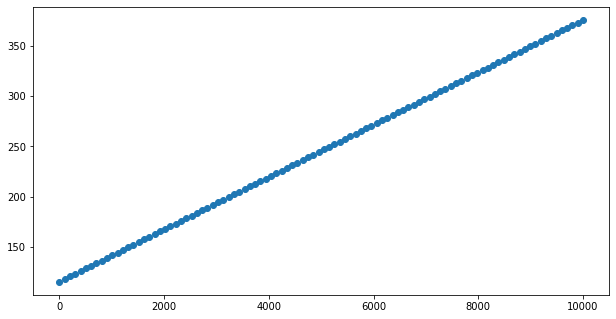

In [54]:
#Plotting curve

fig= plt.figure(figsize=(10,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
x=df["Depth"]
y=df["SICP"]
plt.scatter(x,y)

In [3]:
df.head()

,Depth,HSP,FP,SIDPP,SICP,PAB
0,0,0.00,0.000,0.000,115.46709,-26.143492
1,1,0.65,0.676,0.026,115.49309,-25.467492
2,2,1.30,1.352,0.052,115.51909,-24.791492
3,3,1.95,2.028,0.078,115.54509,-24.115492
4,4,2.60,2.704,0.104,115.57109,-23.439492


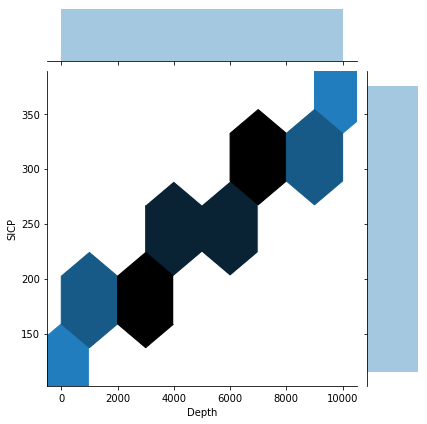

In [43]:
sns.jointplot(x='Depth',y='SICP',data=df,kind='hex')

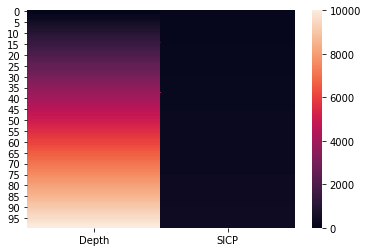

In [52]:
q = df[["Depth","SICP"]]
sns.heatmap(q)